In [87]:
using HorizonSideRobots
using PyPlot; pygui(true)
h, w = 10, 10
r = Robot(h, w)
show!(r)

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


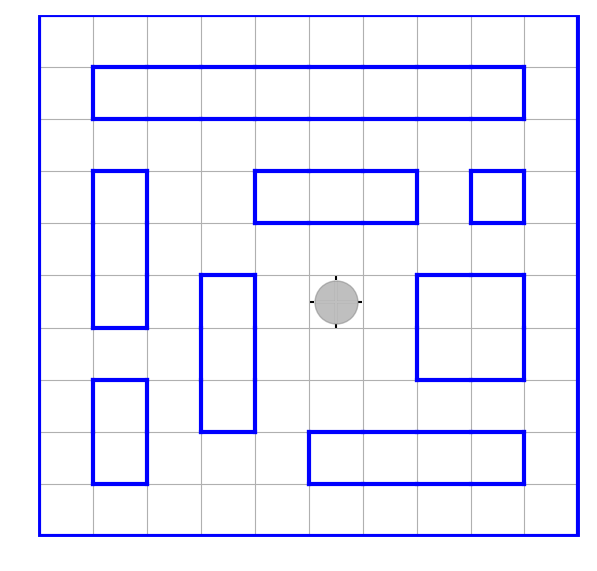

In [88]:
show(r)

In [89]:
a = []

function do_it(side::HorizonSide, a::Int64)
    res = [mod(Int(side)+2, 4) for i in (1:a)]
    return res
end

function move_till_border(r, side)
    a = 0
    while !isborder(r, side)
        move!(r, side)
        a += 1
    end
    return a
end

function f(r)
    append!(a, do_it(West, move_till_border(r, West)))
    if isborder(r, West) && isborder(r, Nord)
        return nothing
    end
    return g(r)
end

function g(r)
    append!(a, do_it(Nord, move_till_border(r, Nord)))
    if isborder(r, West) && isborder(r, Nord)
        return nothing
    end
    return f(r)
end

function go_back(r, a)
    for side in a
        move!(r, HorizonSide(side))
    end
end

f(r)
putmarker!(r)
move_till_border(r, Ost)
putmarker!(r)
move_till_border(r, Sud)
putmarker!(r)
move_till_border(r, West)
putmarker!(r)
move_till_border(r, Nord)

go_back(r, reverse(a))

┌ Warning: Окно с предыдущей обстановкой при открытии нового было автоматически закрыто
└ @ HorizonSideRobots C:\Users\slava\.julia\packages\HorizonSideRobots\tWWme\src\HorizonSideRobots.jl:186


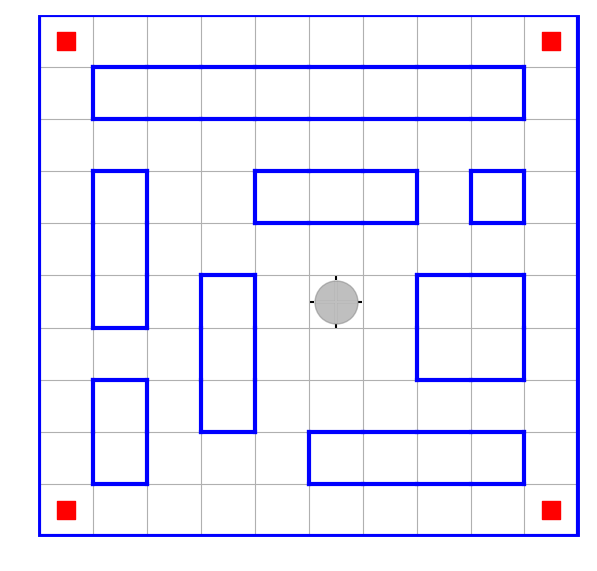

In [90]:
show(r)